In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('Apoyo_Lectura/qog_std_cs_jan18.csv')

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8,6)

import sys
sys.path.insert(0, './Apoyo_Lectura')
import lec4_graphs as gfx

In [18]:
import seaborn as sns

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <a list of 10 Patch objects>)

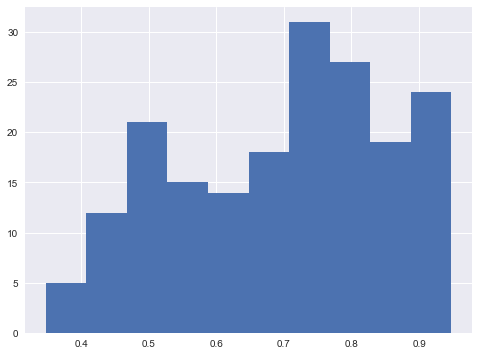

In [19]:
plt.hist(df['undp_hdi'].dropna())

Text(0.5, 1.0, 'Distribución Empírica del IDH')

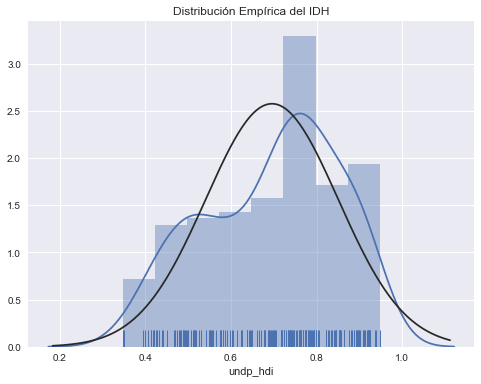

In [20]:
sns.distplot(df['undp_hdi'].dropna(), rug=True, fit=stats.norm)

plt.title('Distribución Empírica del IDH')

In [24]:
df['region_recod'] = df['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                             ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian',
                                              'WesternDem', 'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'
                                             ])

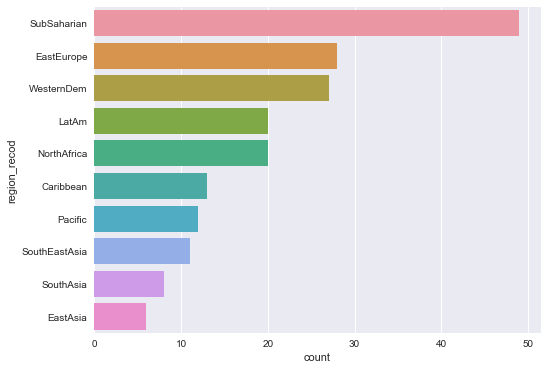

In [25]:
sns.countplot(y=df['region_recod'], order=df['region_recod'].value_counts().index)

In [26]:
df['region_recod'].value_counts()

SubSaharian      49
EastEurope       28
WesternDem       27
LatAm            20
NorthAfrica      20
Caribbean        13
Pacific          12
SouthEastAsia    11
SouthAsia         8
EastAsia          6
Name: region_recod, dtype: int64

In [27]:
df['region_recod'].head()

0      SouthAsia
1     EastEurope
2    NorthAfrica
3     WesternDem
4    SubSaharian
Name: region_recod, dtype: object

In [28]:
df['demo'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No Democracia')

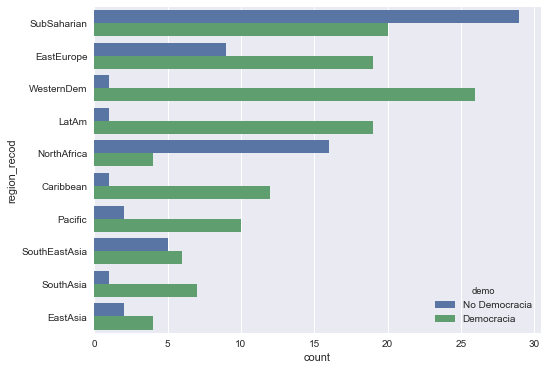

In [29]:
sns.countplot(y=df['region_recod'], hue=df['demo'], order=df['region_recod'].value_counts().index)

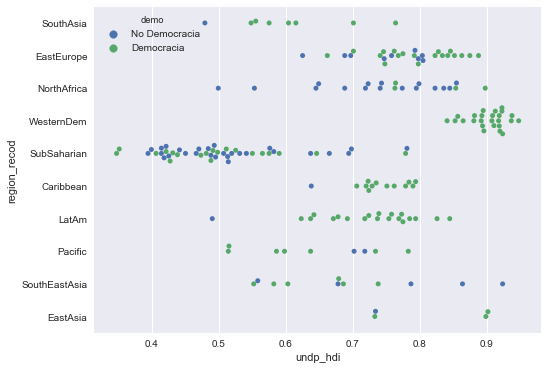

In [31]:
sns.swarmplot(y=df['region_recod'],
              x=df['undp_hdi'],
             hue=df['demo'])

## FaceGrid

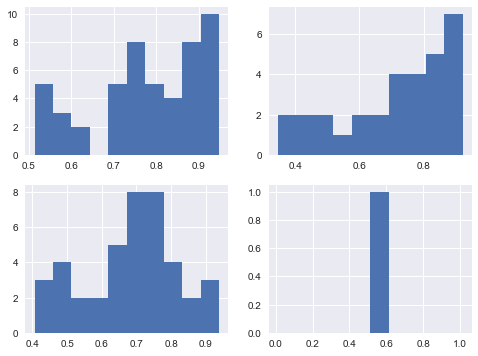

In [33]:
gol_0 = df[df['gol_inst'] == 0.0]['undp_hdi'].dropna()
gol_1 = df[df['gol_inst'] == 1.0]['undp_hdi'].dropna()
gol_2 = df[df['gol_inst'] == 2.0]['undp_hdi'].dropna()
gol_4 = df[df['gol_inst'] == 4.0]['undp_hdi'].dropna()

# generamos dos iterables con enumerate
for i, j in enumerate([gol_0, gol_1, gol_2, gol_4]):
    # asignamos una posición específica en la grilla
    plt.subplot(2, 2, i + 1)
    # generamos el gráfico
    plt.hist(j)

/Users/luisalfredoporraspaez/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/luisalfredoporraspaez/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


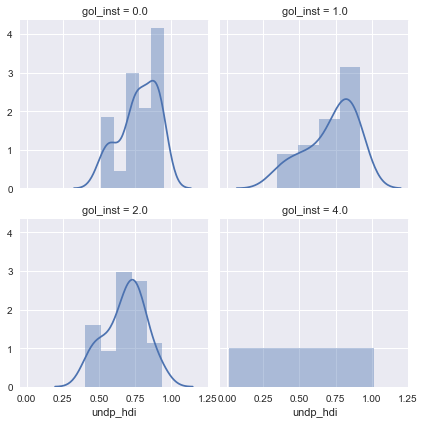

In [37]:
grid = sns.FacetGrid(df, col="gol_inst", col_wrap=2)
grid = grid.map(sns.distplot, 'undp_hdi')